In [40]:
from utils import read_im, save_im, normalize
import matplotlib.pyplot as plt
import numpy as np




def convolve_2d(channel, kernel):
    """
    Performs 2D convolution on a single channel.
    
    Args:
        channel (np.array): 2D numpy array representing the image channel
        kernel (np.array): 2D numpy array representing the convolution kernel
        
    Returns:
        np.array: 2D array with the convolved result
    """
    # Get the dimensions of the image channel and kernel
    H, W = channel.shape
    K = kernel.shape[0]
    
    # Calculate the padding size (assuming kernel is square and size is odd)
    pad_size = K // 2
    
    # Pad the image with zeros around the border
    padded_channel = np.pad(channel, pad_size, mode='constant', constant_values=0)
    
    # Initialize the output array
    output = np.zeros_like(channel)
    
    # Perform convolution
    for i in range(H):
        for j in range(W):
            # Extract the region of interest from the padded image
            region = padded_channel[i:i+K, j:j+K]
            
            # Perform element-wise multiplication and sum the result
            output[i, j] = np.sum(region * kernel)
    
    return output

def convolve_im(im, kernel):
    """
    Performs 2D convolution on an RGB image with the given kernel.
    
    Args:
        im (np.array): RGB image of shape [H, W, 3]
        kernel (np.array): Convolution kernel of shape [K, K]
        
    Returns:
        np.array: Convolved RGB image of shape [H, W, 3]
    """
    # Separate the image into its three channels
    red_channel = im[:, :, 0]
    green_channel = im[:, :, 1]
    blue_channel = im[:, :, 2]
    
    # Perform convolution on each channel separately
    red_convolved = convolve_2d(red_channel, kernel)
    green_convolved = convolve_2d(green_channel, kernel)
    blue_convolved = convolve_2d(blue_channel, kernel)
    
    # Stack the convolved channels back together
    convolved_im = np.stack([red_convolved, green_convolved, blue_convolved], axis=-1)
    
    return convolved_im

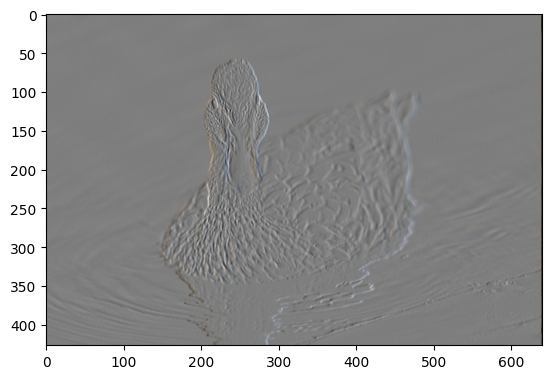

In [41]:
h_a = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

im = read_im("images/duck.jpeg")
im_sobel = convolve_im(im, h_a)
im_sobel = normalize(im_sobel)

plt.imshow(im_sobel)
save_im("results/duck_sobel.jpeg", im_sobel)

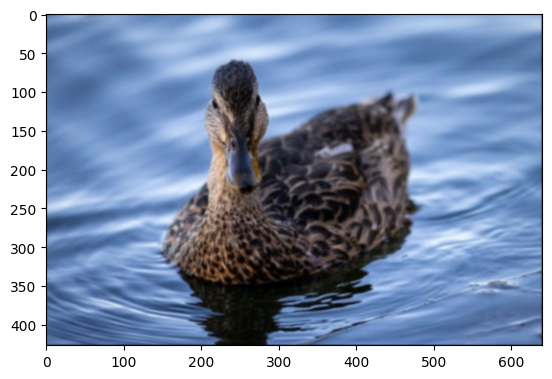

In [42]:
h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
 
im_smoothed = convolve_im(im, h_b)
im_smoothed = normalize(im_smoothed)

plt.imshow(im_smoothed, cmap='gray')
save_im("results/duck_smoothed.jpeg", im_smoothed)

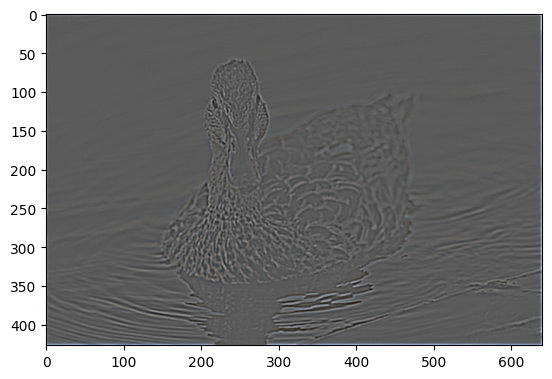

In [57]:
# Laplacian of Gaussian (LoG)
# Step 1: Apply Gaussian Smoothing
gaussian_kernel = 1/256 * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])

# Step 2: Apply Laplacian for Edge Detection
laplacian_kernel = 1 / 256 * np.array([
    [0, 0, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 8, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
])

# Apply Gaussian smoothing
im_smoothed = convolve_im(im, gaussian_kernel)

# Apply Laplacian edge detection on the smoothed image
im_edges = convolve_im(im_smoothed, laplacian_kernel)

# Normalize and display the result
im_edges = normalize(im_edges)
plt.imshow(im_edges, cmap='gray')
save_im("results/duck_experimental_LoG.jpeg", im_edges)
